In [1]:
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import numpy as np # linear algebra
import os #direct your file image
from PIL import Image # (PIL-Pillow library) allowing users to open ,manipilate,save different types of image files
from PIL import ImageOps # useful for quickly applying common transformation that are not directly available in the image module
import matplotlib.pyplot as plt # visulaziation
from sklearn.model_selection import train_test_split # Split the train and the validation set for the fitting
import tensorflow as tf 
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D
import warnings
warnings.filterwarnings("ignore")
plt.style.use("ggplot")

In [2]:
# Download latest version

path =("C:/Users/ADMIN/Downloads/archive (1).csv")

print("Path to dataset files:", path)

Path to dataset files: C:/Users/ADMIN/Downloads/archive (1).csv


In [3]:
# Data path

dataset_path = os.path.join(path, "C:/Users/ADMIN/Downloads/archive (1).csv")



# List files in the dataset directory

files = os.listdir(dataset_path)

print("Files in dataset directory:", files)

Files in dataset directory: ['Meta', 'Meta.csv', 'ResizedTrain', 'Test', 'Test.csv', 'Train', 'Train.csv']


In [4]:
# Load the dataset
df = pd.read_csv(os.path.join(dataset_path, "Train.csv"))
print("Training dataset:")
print(df.head())

Training dataset:
   Width  Height  Roi.X1  Roi.Y1  Roi.X2  Roi.Y2  ClassId  \
0     27      26       5       5      22      20       20   
1     28      27       5       6      23      22       20   
2     29      26       6       5      24      21       20   
3     28      27       5       6      23      22       20   
4     28      26       5       5      23      21       20   

                             Path  
0  Train/20/00020_00000_00000.png  
1  Train/20/00020_00000_00001.png  
2  Train/20/00020_00000_00002.png  
3  Train/20/00020_00000_00003.png  
4  Train/20/00020_00000_00004.png  


In [5]:
df_test = pd.read_csv(os.path.join(dataset_path, "Test.csv"))
print("\nTest dataset:")
print(df_test.head())


Test dataset:
   Width  Height  Roi.X1  Roi.Y1  Roi.X2  Roi.Y2  ClassId            Path
0     53      54       6       5      48      49       16  Test/00000.png
1     42      45       5       5      36      40        1  Test/00001.png
2     48      52       6       6      43      47       38  Test/00002.png
3     27      29       5       5      22      24       33  Test/00003.png
4     60      57       5       5      55      52       11  Test/00004.png


In [6]:
meta = pd.read_csv(os.path.join(dataset_path, "Meta.csv"))
print("\nMeta dataset:")
print(meta.head())


Meta dataset:
          Path  ClassId  ShapeId  ColorId SignId
0  Meta/27.png       27        0        0   1.32
1   Meta/0.png        0        1        0   3.29
2   Meta/1.png        1        1        0   3.29
3  Meta/10.png       10        1        0   3.27
4  Meta/11.png       11        0        0   1.22


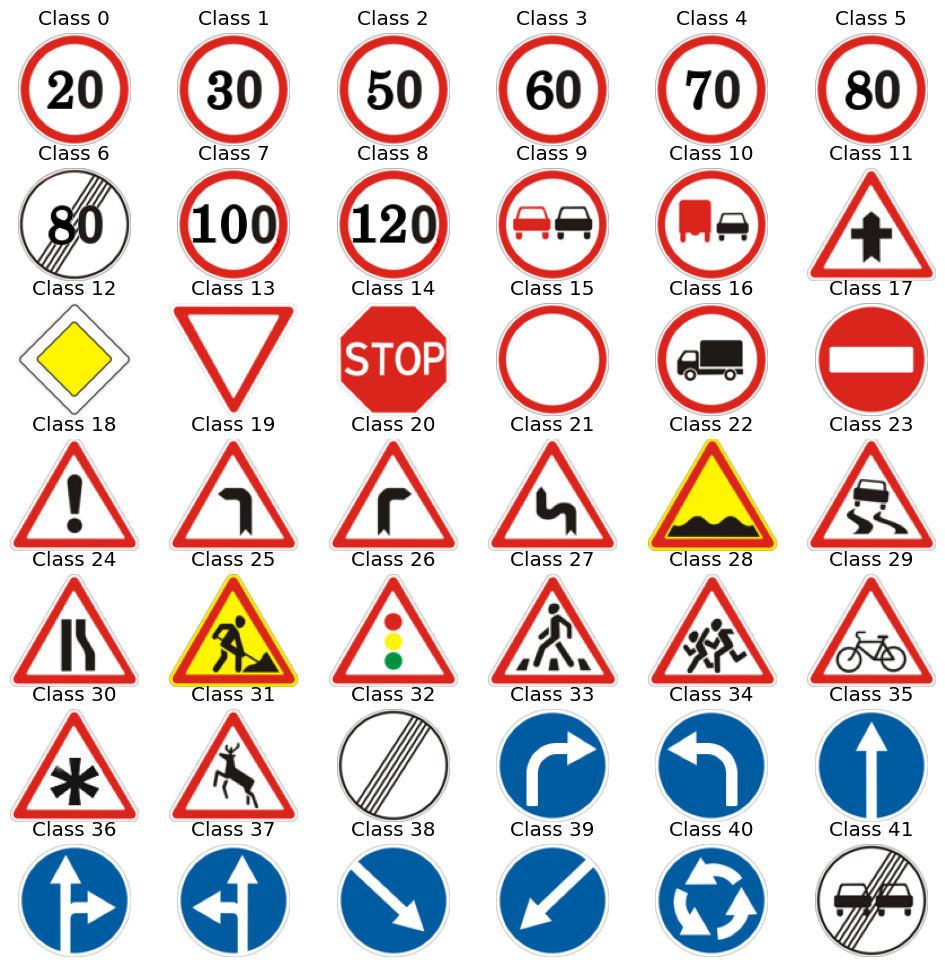

In [7]:
# Show all 42 images in meta dataset
# Rank the classes from 0 to 42 before displaying
meta_sorted = meta.sort_values(by="ClassId").reset_index(drop=True)
fig, axs = plt.subplots(7, 6, figsize=(12, 12))
for i in range(42):
    img_path = os.path.join(dataset_path, meta_sorted.iloc[i]["Path"])
    img = Image.open(img_path)
    axs[i // 6, i % 6].imshow(img)
    axs[i // 6, i % 6].axis("off")
    axs[i // 6, i % 6].set_title(f"Class {meta_sorted.iloc[i]["ClassId"]}")
plt.show()

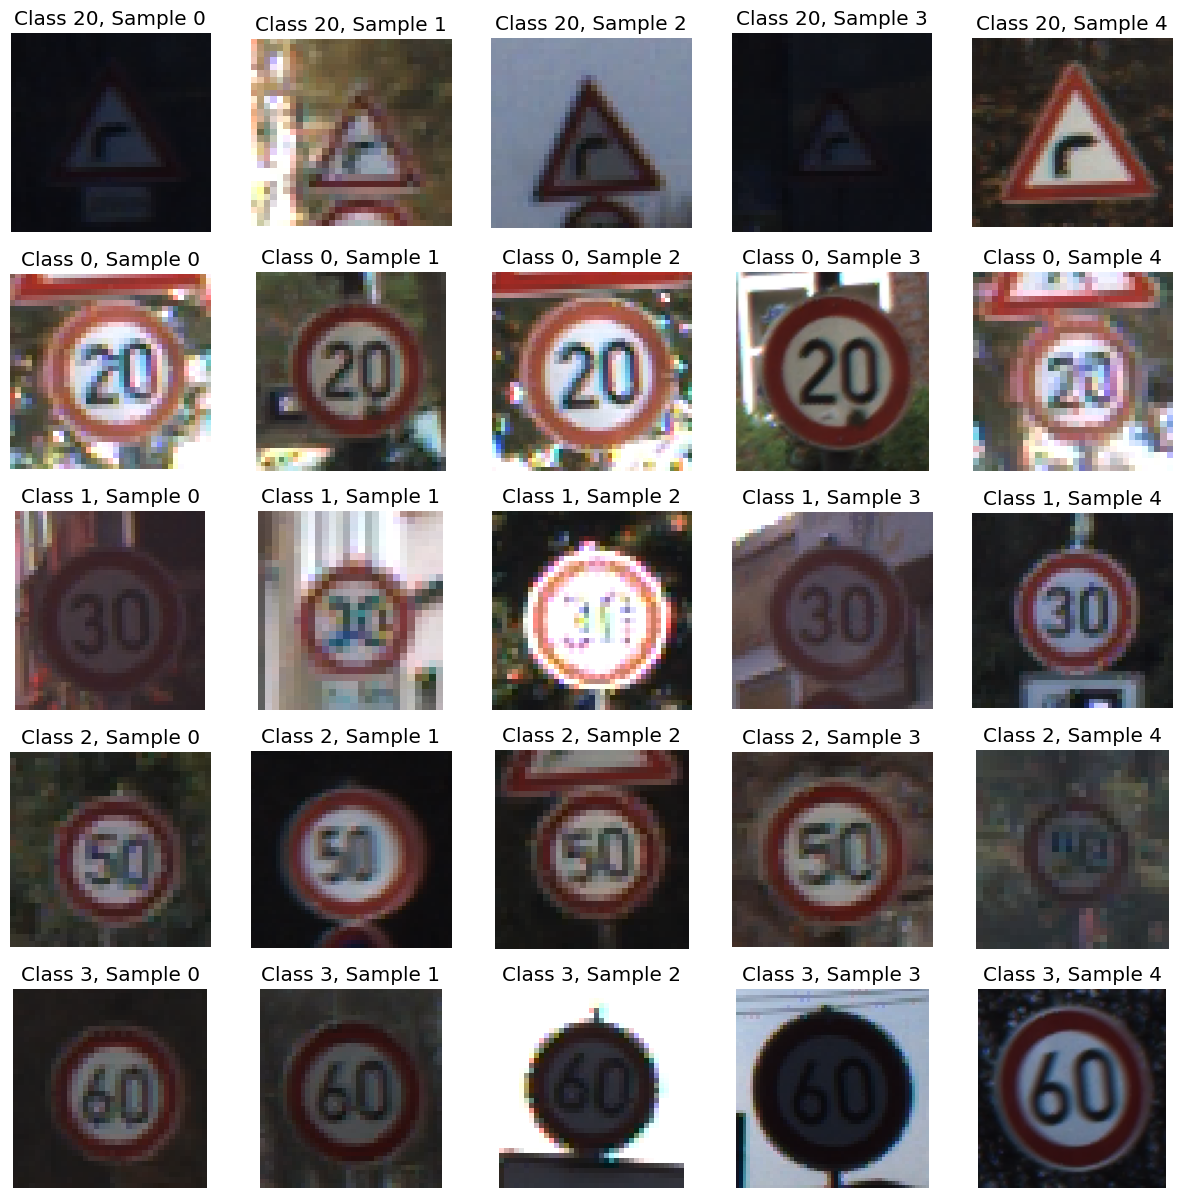

In [8]:
# Show first 5 images from the 5 folder in training dataset
unique_classes = df["ClassId"].unique()[:5] 
fig, axs = plt.subplots(5, 5, figsize=(15, 15))
for i, class_id in enumerate(unique_classes):
    class_samples = df[df["ClassId"] == class_id].sample(5, random_state=1) 
    for j in range(5):
        img_path = os.path.join(dataset_path, class_samples.iloc[j]["Path"])
        img = Image.open(img_path)
        axs[i, j].imshow(img)
        axs[i, j].axis("off")
        axs[i, j].set_title(f"Class {class_id}, Sample {j}")
plt.show()

In [10]:
# Get the average and median width and height of the images in the training dataset
df["Width"] = df["Width"].astype(int)
df["Height"] = df["Height"].astype(int)
print("Average width:", df["Width"].mean())
print("Average height:", df["Height"].mean())
print("Median width:", df["Width"].median())
print("Median height:", df["Height"].median())

Average width: 50.83587951745773
Average height: 50.328929582493814
Median width: 43.0
Median height: 43.0


In [11]:
# Reshape the images to 43x43 pixels
def resize_image(img_path):
    img = Image.open(img_path)
    img = ImageOps.fit(img, (43, 43), Image.LANCZOS)
    return img

In [14]:
# Resize the images in the training dataset
df["ResizedPath"] = df["Path"].apply(lambda x: x.replace("Train", "ResizedTrain"))

In [15]:
os.makedirs(os.path.join(dataset_path, "ResizedTrain"), exist_ok=True)

In [16]:
for i in range(len(df)):
    img_path = os.path.join(dataset_path, df.iloc[i]["Path"])
    resized_img_path = os.path.join(dataset_path, df.iloc[i]["ResizedPath"])
    os.makedirs(os.path.dirname(resized_img_path), exist_ok=True)
    resized_img = resize_image(img_path)
    resized_img.save(resized_img_path)   

In [17]:
# Resize the images in the test dataset
df_test["ResizedPath"] = df_test["Path"].apply(lambda x: x.replace("Test", "ResizedTest"))
os.makedirs(os.path.join(dataset_path, "ResizedTest"), exist_ok=True)
for i in range(len(df_test)):
    img_path = os.path.join(dataset_path, df_test.iloc[i]["Path"])
    resized_img_path = os.path.join(dataset_path, df_test.iloc[i]["ResizedPath"])
    os.makedirs(os.path.dirname(resized_img_path), exist_ok=True)
    resized_img = resize_image(img_path)
    resized_img.save(resized_img_path)

In [18]:
    
# Print out the shape of the resized images
img = Image.open(os.path.join(dataset_path, df.iloc[0]["ResizedPath"]))
print("Resized image shape:", np.array(img).shape)

Resized image shape: (43, 43, 3)


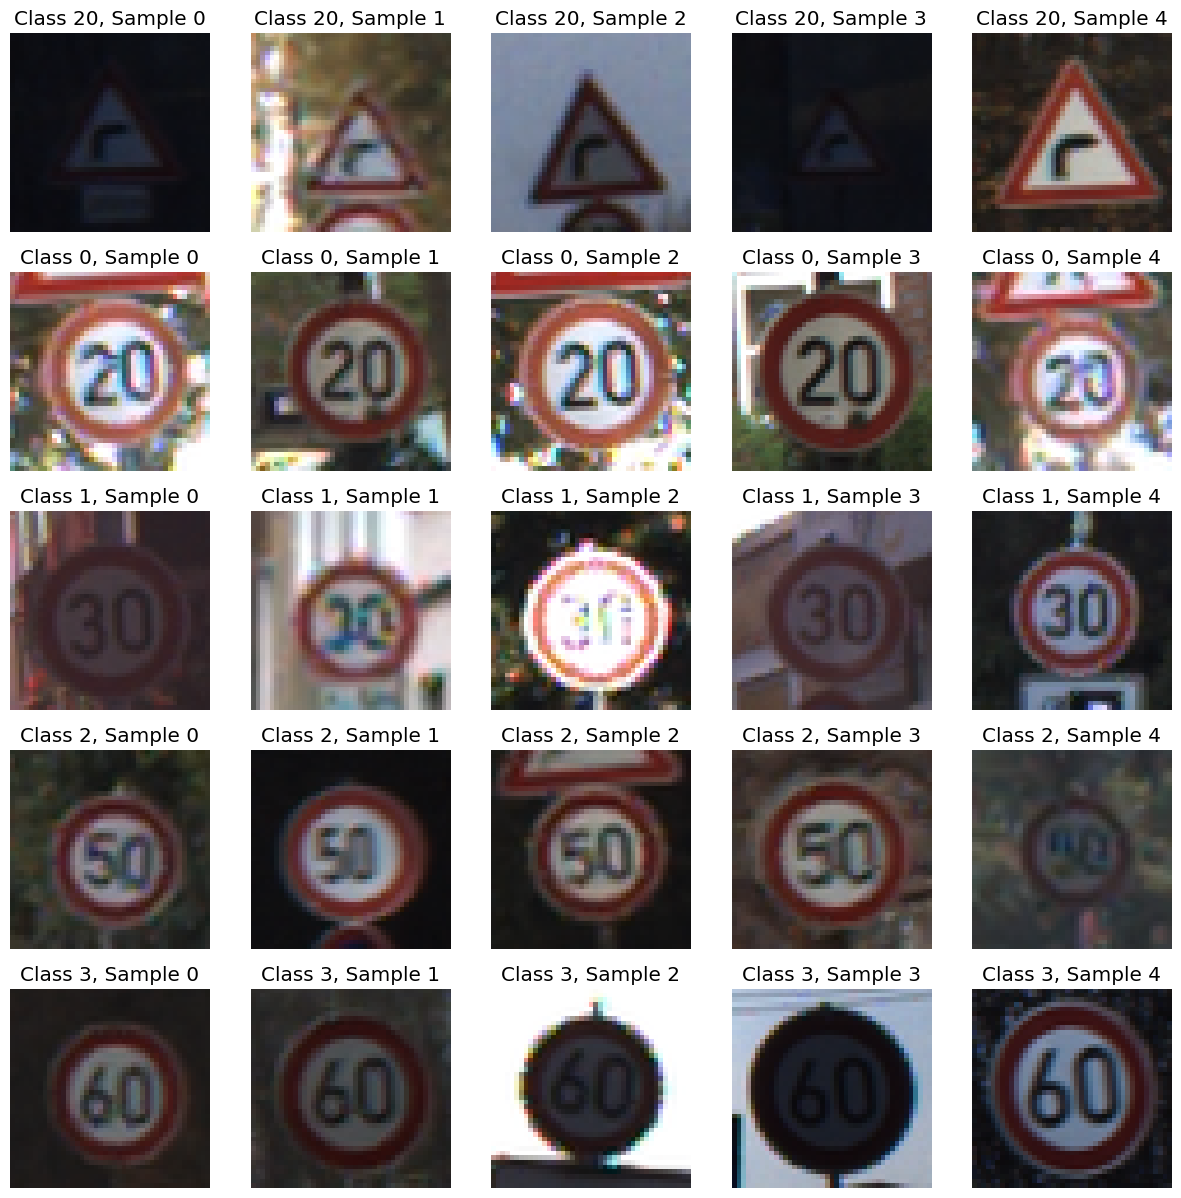

In [20]:
# Show first 5 images from the 5 folder in training dataset
fig, axs = plt.subplots(5, 5, figsize=(15, 15))
for i, class_id in enumerate(unique_classes):
    class_samples = df[df["ClassId"] == class_id].sample(5, random_state=1)
    for j in range(5):
        img_path = os.path.join(dataset_path, class_samples.iloc[j]["ResizedPath"])
        img = Image.open(img_path)
        axs[i, j].imshow(img)
        axs[i, j].axis("off")
        axs[i, j].set_title(f"Class {class_id}, Sample {j}")
plt.show()

In [22]:
# Split dataset into training, validation and test sets
df_train, df_val = train_test_split(df, test_size=0.2, random_state=1)
print("Total training dataset shape:", df.shape)
print("Training dataset shape:", df_train.shape)
print("Validation dataset shape:", df_val.shape)
print("Total test dataset shape:", df_test.shape)

Total training dataset shape: (39209, 9)
Training dataset shape: (31367, 9)
Validation dataset shape: (7842, 9)
Total test dataset shape: (12630, 9)


In [23]:
# Build the model
# 3 convolutional layers with max pooling, 2 dense layers and a dropout layer
model = Sequential([
    Conv2D(32, (3, 3), activation="relu", input_shape=(43, 43, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation="relu"),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation="relu"),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation="relu"),
    Dropout(0.5),
    Dense(43, activation="softmax")
])
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 41, 41, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 20, 20, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 18, 18, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 9, 9, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 7, 7, 128)           │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 3, 3, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 1152)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 43)                  │           5,547 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 246,379 (962.42 KB)

 Trainable params: 246,379 (962.42 KB)

 Non-trainable params: 0 (0.00 B)

In [24]:
# Compile the model

model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])

In [25]:
# Normalize the image pixel values

def load_image(img_path):

    img = Image.open(img_path)

    img = np.array(img) / 255.0

    return img

In [29]:
# Loads and processes images and labels in DataFrame
def load_images(df):
    images = []
    labels = []
    for i in range(len(df)):
        img_path = os.path.join(dataset_path, df.iloc[i]["ResizedPath"])
        img = load_image(img_path)
        images.append(img)
        labels.append(df.iloc[i]["ClassId"])
    return np.array(images), np.array(labels)

In [30]:
x_train, y_train = load_images(df_train)
x_val, y_val = load_images(df_val)
x_test, y_test = load_images(df_test)

In [31]:
# Train the model
model.fit(x_train, y_train, validation_data=(x_val, y_val), epochs=1)

981/981 ━━━━━━━━━━━━━━━━━━━━ 66s 61ms/step - accuracy: 0.2967 - loss: 2.6257 - val_accuracy: 0.9296 - val_loss: 0.3007


In [32]:
# Test the model on the test dataset
test_loss, test_acc = model.evaluate(x_test, y_test)
print("Test accuracy:", test_acc)

395/395 ━━━━━━━━━━━━━━━━━━━━ 9s 22ms/step - accuracy: 0.8866 - loss: 0.4382
Test accuracy: 0.8848772644996643
